In [0]:
%tensorflow_version 2.x

In [2]:
# 1. keras -> tensorflow.keras
from tensorflow.keras.datasets.fashion_mnist import load_data
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


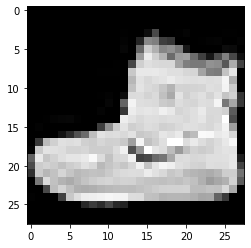

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0], cmap="gray")

In [47]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
mlp = Sequential()
mlp.add(Dense(128, activation="relu", input_dim=784))
mlp.add(Dropout(0.25))
mlp.add(Dense(10, activation="softmax"))
mlp.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
from tensorflow.keras.losses import CategoricalCrossentropy
# 最後一層個數
# 1:"binary_crossentropy" 2up:"categorical_crossentropy"
# 激活函數
# 1:"sigmoid" 2up:"softmax"
mlp.compile(loss=CategoricalCrossentropy(),
            optimizer="adam",
            metrics=["accuracy"])

In [0]:
# mlp: 進去要1D, tensorflow: 輸入[-1, 1][0, 1]
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255
# pd.DataFrame(x_train_norm)

In [50]:
# 答案要做one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print(y_train[0], y_train_cat[0])

9 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [51]:
# batch_size: 問多少筆資料進行一次梯度下降(平均)
# epochs: 整份資料要看幾遍
# validation_split: train_test_split驗證模型到底好不好
# verbose: log level(0:沒有 1:最多 2:適中)
# 270: 54000(train) / 200
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
stop_callback = EarlyStopping(patience=3, restore_best_weights=True)
save_callback = ModelCheckpoint("fashion.h5", save_best_only=True)
mlp.fit(x_train_norm, 
        y_train_cat,
        batch_size=200,
        epochs=100,
        validation_split=0.1,
        callbacks=[stop_callback, save_callback],
        verbose=2)

Epoch 1/100
270/270 - 1s - loss: 0.6602 - accuracy: 0.7723 - val_loss: 0.4707 - val_accuracy: 0.8265
Epoch 2/100
270/270 - 1s - loss: 0.4538 - accuracy: 0.8413 - val_loss: 0.3982 - val_accuracy: 0.8587
Epoch 3/100
270/270 - 1s - loss: 0.4036 - accuracy: 0.8565 - val_loss: 0.3695 - val_accuracy: 0.8668
Epoch 4/100
270/270 - 1s - loss: 0.3797 - accuracy: 0.8643 - val_loss: 0.3617 - val_accuracy: 0.8687
Epoch 5/100
270/270 - 1s - loss: 0.3601 - accuracy: 0.8705 - val_loss: 0.3514 - val_accuracy: 0.8742
Epoch 6/100
270/270 - 1s - loss: 0.3470 - accuracy: 0.8750 - val_loss: 0.3381 - val_accuracy: 0.8765
Epoch 7/100
270/270 - 1s - loss: 0.3364 - accuracy: 0.8792 - val_loss: 0.3327 - val_accuracy: 0.8797
Epoch 8/100
270/270 - 1s - loss: 0.3256 - accuracy: 0.8830 - val_loss: 0.3356 - val_accuracy: 0.8808
Epoch 9/100
270/270 - 1s - loss: 0.3154 - accuracy: 0.8863 - val_loss: 0.3279 - val_accuracy: 0.8785
Epoch 10/100
270/270 - 1s - loss: 0.3079 - accuracy: 0.8879 - val_loss: 0.3167 - val_accura

In [52]:
# predict: 機率 predict_classes: 類別
pre = mlp.predict_classes(x_test_norm)
pre

array([9, 2, 1, ..., 8, 1, 5])

In [53]:
mlp.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.3268 - accuracy: 0.8826


[0.32683783769607544, 0.8826000094413757]

In [25]:
import numpy as np
from sklearn.metrics import confusion_matrix
names = [
    "T-shirt",
 	"Trouser",
	"Pullover",
	"Dress",
	"Coat",
	"Sandal",
	"Shirt",
	"Sneaker",
	"Bag",
	"Ankle boot"
]
c = ["{}(預測)".format(i) for i in names]
i = ["{}(正確)".format(i) for i in names]
mat = confusion_matrix(y_test, pre)
mat = [np.round(row/sum(row), 3) for row in mat]
pd.DataFrame(mat, columns=c, index=i)

,T-shirt(預測),Trouser(預測),Pullover(預測),Dress(預測),Coat(預測),Sandal(預測),Shirt(預測),Sneaker(預測),Bag(預測),Ankle boot(預測)
T-shirt(正確),0.829,0.000,0.017,0.022,0.003,0.001,0.116,0.000,0.012,0.000
Trouser(正確),0.002,0.968,0.002,0.022,0.002,0.000,0.003,0.000,0.001,0.000
Pullover(正確),0.012,0.000,0.767,0.007,0.116,0.000,0.096,0.000,0.002,0.000
Dress(正確),0.026,0.006,0.011,0.872,0.041,0.000,0.038,0.000,0.006,0.000
Coat(正確),0.000,0.001,0.076,0.022,0.848,0.000,0.050,0.000,0.003,0.000
Sandal(正確),0.000,0.000,0.000,0.001,0.000,0.954,0.000,0.027,0.001,0.017
Shirt(正確),0.104,0.002,0.077,0.023,0.090,0.000,0.692,0.000,0.012,0.000
Sneaker(正確),0.000,0.000,0.000,0.000,0.000,0.023,0.000,0.951,0.000,0.026
Bag(正確),0.003,0.000,0.006,0.002,0.004,0.002,0.006,0.003,0.974,0.000
Ankle boot(正確),0.000,0.000,0.000,0.000,0.000,0.008,0.001,0.039,0.000,0.952


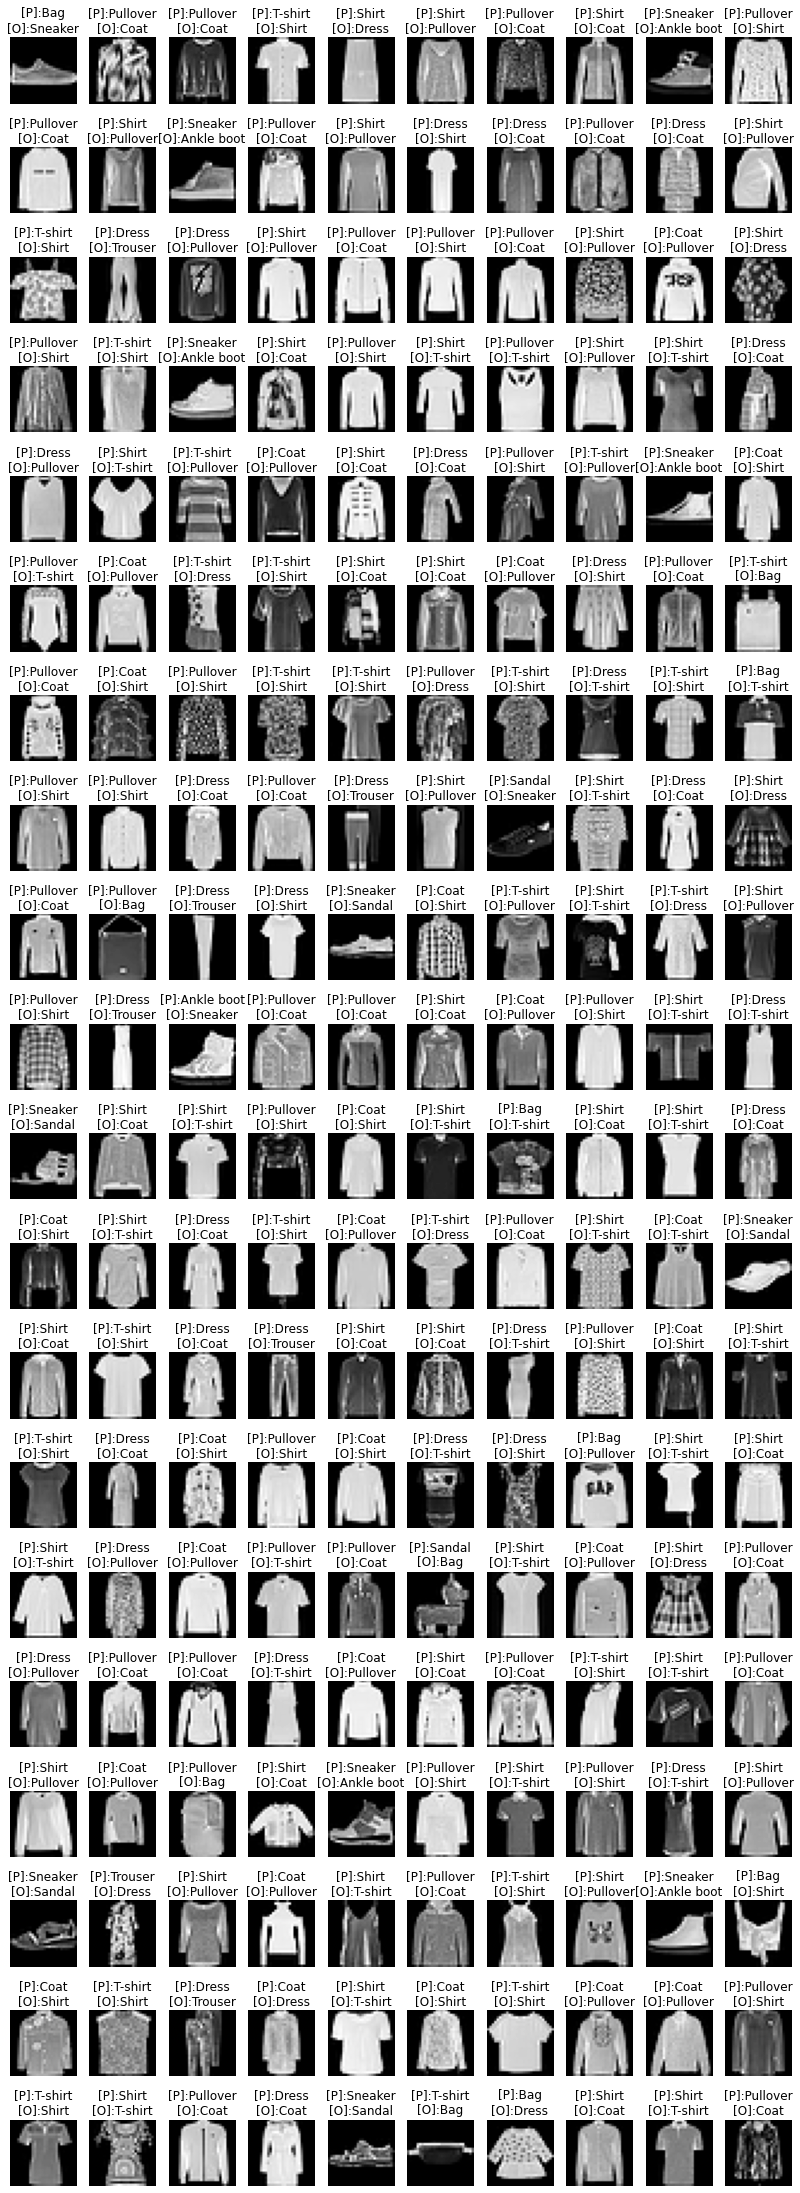

In [17]:
# [:200]: 太多錯, 我只取前兩百個
idx = np.nonzero(pre != y_test)[0][:200]
false_pre_img = x_test[idx]
false_pre_label = y_test[idx]
false_pre_predict = pre[idx]

width = 10
height = len(idx) // width + 1
plt.figure(figsize=(14, 42))
for i, img in enumerate(false_pre_img):
    plt.subplot(height, width, i+1)
    t = "[P]:{}\n[O]:{}".format(names[false_pre_predict[i]],
                                names[false_pre_label[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(img, cmap="gray")

檔名:test2.png
正確答案應該是: T-shirt


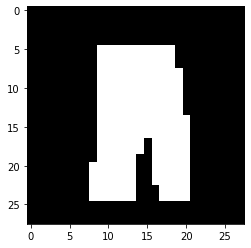

In [44]:
from tensorflow.keras.preprocessing.image import load_img
f = input("檔名:")
img_raw = load_img(f, target_size=(28, 28)).convert("L")
img = np.array(img_raw).reshape(1, 784) / 255
answer = mlp.predict_classes(img)[0]
print("正確答案應該是:", names[answer])
plt.imshow(img_raw, cmap="gray")

In [54]:
# 儲存: mlp.save("mlp.h5")
# 如果你想看儲存的樣子: https://support.hdfgroup.org/products/java/release/download.html
# 讀取: 
from tensorflow.keras.models import load_model
loaded = load_model("fashion.h5")
# 讀取完: fit, evaluate, predict, 不需要compile
loaded.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.3268 - accuracy: 0.8826


[0.32683783769607544, 0.8826000094413757]